In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import os

In [2]:
#Importing libraries for visualizations

import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
#Importing dataset

path = r'/Users/alejandroguillen/Documents/Instacart Basket Analysis'

In [4]:
ords_prods_merge = pd.read_pickle(os.path.join(path,'02 Data','Prepared Data','orders_products_merged_updated.pkl'))

<Axes: >

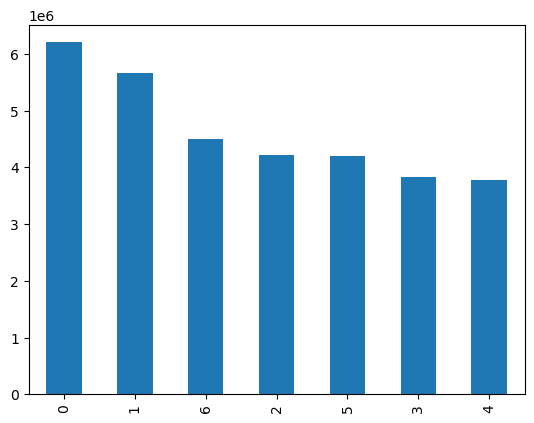

In [5]:
#Create a bar chart
ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

<Axes: >

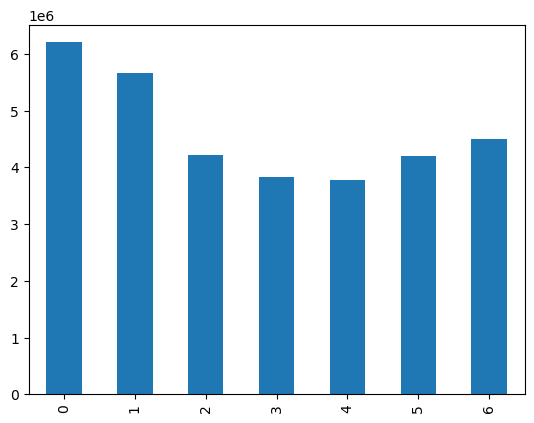

In [6]:
#Chaging the order
ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [7]:
# Frequencies with sort_index
ords_prods_merge['orders_day_of_week'].value_counts()

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: orders_day_of_week, dtype: int64

In [8]:
ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: orders_day_of_week, dtype: int64

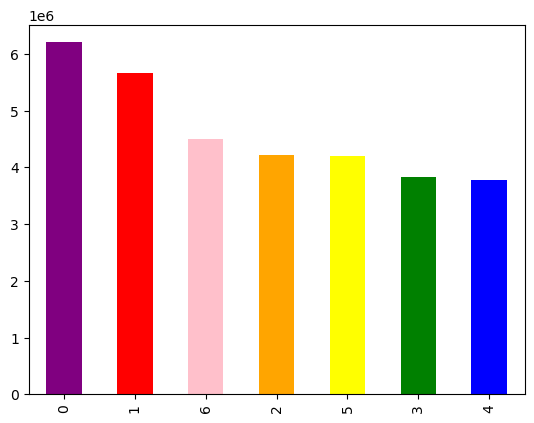

In [9]:
#Adding color

bar=ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color=['purple','red','pink','orange','yellow','green','blue'])


In [10]:
#Exporting bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow.png'))

## Histogram

<Axes: ylabel='Frequency'>

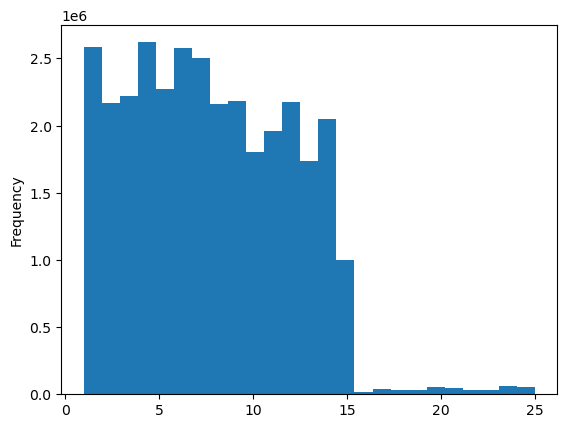

In [11]:
# Creating histogram
ords_prods_merge['prices'].plot.hist(bins = 25)

<Axes: xlabel='prices', ylabel='prices'>

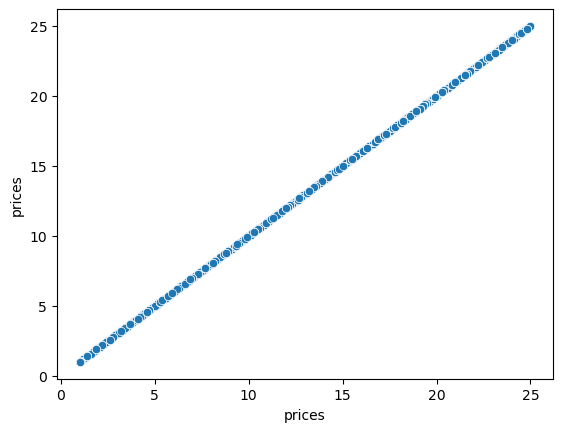

In [12]:
#Scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = ords_prods_merge)

In [13]:
#Checking prices
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days,busiest_period_of_day


In [14]:
#Checking maximum values

ords_prods_merge['prices'].max()

25.0

### No outliers found

<Axes: ylabel='Frequency'>

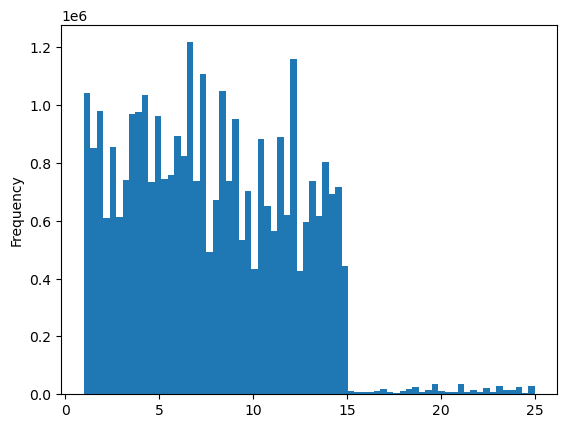

In [15]:
#Increasing the granularity in histogram
ords_prods_merge['prices'].plot.hist(bins = 70)

In [17]:
#Exporting Histogram
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_orders_dow.png'))

# Sampling Data

In [18]:
#Create a list holding True/False values to the test np.random.rant() <=7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [19]:
#Store 70% of the sample in the dataframe big

big = ords_prods_merge[dev]

In [20]:
#Store 30% of the sample in the dataframe small

small = ords_prods_merge[~dev]

In [21]:
#Check output
len(ords_prods_merge)

32404859

In [22]:
len(big)+len(small)

32404859

### Observation: same output in row numbers confirming that the operation was successful. 

In [23]:
#Reducing samples

df_2 = small[['orders_day_of_week','prices']]

In [24]:
df_2

,orders_day_of_week,prices
0,2,9.0
2,3,9.0
3,4,9.0
6,1,9.0
10,1,9.0
...,...,...
32404841,1,8.8
32404842,2,8.8
32404843,0,3.7
32404849,3,3.7


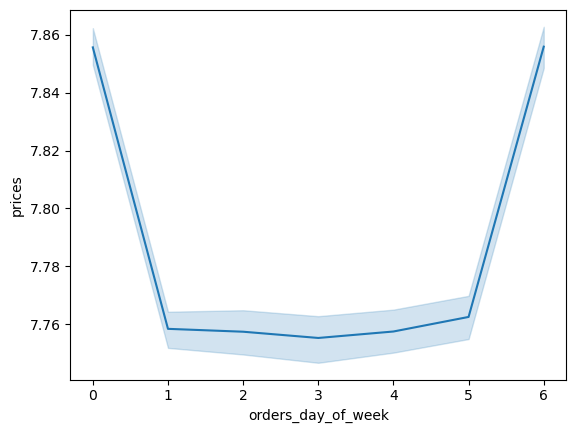

In [25]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')